In [1]:
import pandas as pd
import numpy as np 
import torch
from torch import nn
from torch.utils import data
from torch.nn import functional as F
from torchsummary import summary
from torch.autograd import Variable

In [2]:
print('GPU:', torch.cuda.is_available())

GPU: False


# Load Data

In [68]:
# Read the data
import glob,os
path=r'../Dataset/hai-master/hai-21.03'
file=glob.glob(os.path.join(path, "test*.csv"))
print(file)
dl= []
for f in file:
 dl.append(pd.read_csv(f,header=[0],index_col=None))
test_df=pd.concat(dl)

['../Dataset/hai-master/hai-21.03\\test1.csv', '../Dataset/hai-master/hai-21.03\\test2.csv', '../Dataset/hai-master/hai-21.03\\test3.csv', '../Dataset/hai-master/hai-21.03\\test4.csv', '../Dataset/hai-master/hai-21.03\\test5.csv']


In [310]:
test_df[0:2].shape[0]

2

In [69]:
# Read the data
import glob,os
path=r'../Dataset/hai-master/hai-21.03'
file=glob.glob(os.path.join(path, "train*.csv"))
print(file)
dl= []
for f in file:
 dl.append(pd.read_csv(f,header=[0],index_col=None))
train_df=pd.concat(dl)

['../Dataset/hai-master/hai-21.03\\train1.csv', '../Dataset/hai-master/hai-21.03\\train2.csv', '../Dataset/hai-master/hai-21.03\\train3.csv']


In [70]:
# dl= []

In [71]:
# dl.append(pd.read_csv('../Dataset\\data1.csv',header=[0],index_col=None))
# dl.append(pd.read_csv('../Dataset\\data2.csv',header=[0],index_col=None))
# df=pd.concat(dl)

In [72]:
test_df.shape

(402005, 84)

In [73]:
test_df.head()

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2020-07-07 15:00:00,0.10178,1.58771,403.78854,985.37353,32.59527,100.0,2839.58520,36.81010,100.0,...,20469.0,386.26666,380.31683,0,10044.0,27567.0,0,0,0,0
1,2020-07-07 15:00:01,0.10178,1.58725,403.78854,985.37353,32.59527,100.0,2843.37549,36.80895,100.0,...,20489.0,386.30286,380.02747,0,10040.0,27564.0,0,0,0,0
2,2020-07-07 15:00:02,0.10178,1.59519,403.78854,985.37353,32.59527,100.0,2845.06006,36.82879,100.0,...,20604.0,389.73883,381.52850,0,10037.0,27565.0,0,0,0,0
3,2020-07-07 15:00:03,0.10178,1.59747,403.78854,985.37353,32.59527,100.0,2837.33911,36.83451,100.0,...,20633.0,388.94311,382.08911,0,10040.0,27560.0,0,0,0,0
4,2020-07-07 15:00:04,0.10178,1.59869,403.78854,985.37353,32.59527,100.0,2843.37549,36.83756,100.0,...,20738.0,389.72082,383.44543,0,10042.0,27564.0,0,0,0,0


In [74]:
train_df.shape

(921603, 84)

In [75]:
train_df.head()

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2020-07-11 00:00:00,0.10121,1.29784,397.63785,1001.99799,33.6555,100.0,2847.02539,37.14706,100.0,...,16495.0,301.35992,305.03113,0,10052.0,27610.0,0,0,0,0
1,2020-07-11 00:00:01,0.10121,1.29692,397.63785,1001.99799,33.6555,100.0,2839.58520,37.14477,100.0,...,16402.0,297.43567,304.27161,0,10052.0,27610.0,0,0,0,0
2,2020-07-11 00:00:02,0.10121,1.29631,397.63785,1001.99799,33.6555,100.0,2833.26807,37.14325,100.0,...,16379.0,298.66534,303.89179,0,10050.0,27617.0,0,0,0,0
3,2020-07-11 00:00:03,0.10121,1.28685,397.63785,1001.99799,33.6555,100.0,2834.95264,37.11959,100.0,...,16422.0,298.06860,303.67474,0,10052.0,27614.0,0,0,0,0
4,2020-07-11 00:00:04,0.10121,1.28807,397.63785,1001.99799,33.6555,100.0,2832.70654,37.12265,100.0,...,16355.0,296.53137,303.22266,0,10052.0,27621.0,0,0,0,0


In [76]:
train_df['attack'].value_counts()

0    921603
Name: attack, dtype: int64

In [77]:
test_df['attack'].value_counts()

0    393058
1      8947
Name: attack, dtype: int64

In [78]:
test_df

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2020-07-07 15:00:00,0.10178,1.58771,403.78854,985.37353,32.59527,100.0,2839.58520,36.81010,100.00000,...,20469.0,386.26666,380.31683,0,10044.0,27567.0,0,0,0,0
1,2020-07-07 15:00:01,0.10178,1.58725,403.78854,985.37353,32.59527,100.0,2843.37549,36.80895,100.00000,...,20489.0,386.30286,380.02747,0,10040.0,27564.0,0,0,0,0
2,2020-07-07 15:00:02,0.10178,1.59519,403.78854,985.37353,32.59527,100.0,2845.06006,36.82879,100.00000,...,20604.0,389.73883,381.52850,0,10037.0,27565.0,0,0,0,0
3,2020-07-07 15:00:03,0.10178,1.59747,403.78854,985.37353,32.59527,100.0,2837.33911,36.83451,100.00000,...,20633.0,388.94311,382.08911,0,10040.0,27560.0,0,0,0,0
4,2020-07-07 15:00:04,0.10178,1.59869,403.78854,985.37353,32.59527,100.0,2843.37549,36.83756,100.00000,...,20738.0,389.72082,383.44543,0,10042.0,27564.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92396,2020-07-31 12:29:56,0.06112,1.45290,417.58124,989.50207,32.00000,0.0,31.97761,35.97946,3.67038,...,19259.0,361.14728,357.27722,0,10052.0,27627.0,0,0,0,0
92397,2020-07-31 12:29:57,0.06112,1.45382,417.58124,989.50207,32.00000,0.0,32.97053,35.98175,3.69119,...,19257.0,359.84521,357.29529,0,10052.0,27627.0,0,0,0,0
92398,2020-07-31 12:29:58,0.06112,1.45428,417.58124,989.50207,32.00000,0.0,33.96383,35.98289,3.66543,...,19248.0,360.60474,357.27722,0,10050.0,27627.0,0,0,0,0
92399,2020-07-31 12:29:59,0.06112,1.45458,417.58124,989.50207,32.00000,0.0,31.97761,35.98366,3.63935,...,19275.0,357.42188,357.80170,0,10053.0,27627.0,0,0,0,0


In [79]:
test_df.describe()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
count,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,...,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000,402005.000000
mean,0.091431,1.389921,403.798729,1066.074738,32.285249,58.924257,1741.935584,36.031480,53.314444,53.103314,...,17923.855068,332.192397,332.465165,8.918421,10050.187750,27608.471828,0.022256,0.017505,0.004637,0.002383
std,0.018979,0.134062,11.981150,51.409852,0.571706,42.214697,1200.694504,0.670232,43.104898,43.098623,...,1828.472994,37.394611,33.982635,19.141153,24.580383,24.517653,0.147515,0.131143,0.067936,0.048758
min,0.030110,0.959140,374.638610,902.981140,31.379050,0.000000,25.025980,34.225440,0.000000,0.260930,...,12660.000000,231.119810,235.622800,0.000000,9695.000000,27519.000000,0.000000,0.000000,0.000000,0.000000
25%,0.098290,1.312640,397.637850,1018.359010,32.000000,10.804490,305.078120,35.577770,13.731810,13.276670,...,16879.000000,307.526790,313.114870,0.000000,10051.000000,27592.000000,0.000000,0.000000,0.000000,0.000000
50%,0.099510,1.386060,400.835820,1085.589360,32.000000,74.562280,2477.326420,35.887980,38.567150,38.652040,...,17859.000000,331.778080,331.217470,0.000000,10053.000000,27623.000000,0.000000,0.000000,0.000000,0.000000
75%,0.101090,1.464340,407.549830,1104.476070,32.615000,100.000000,2831.723880,36.399530,100.000000,99.708420,...,18919.000000,355.052860,350.929570,0.000000,10053.000000,27627.000000,0.000000,0.000000,0.000000,0.000000
max,0.101930,2.009630,448.763430,1121.941160,33.655500,100.000000,2860.977300,38.455970,100.000000,100.000000,...,26450.000000,496.455440,491.500310,50.000000,10330.000000,27627.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
# np.any(np.isnan(df))

In [81]:
# torch.cuda.is_available()

Data preprocessing

In [82]:
# label Encoding
# df['marker'] = df['marker'].replace(['Natural'],0)
# df['marker'] = df['marker'].replace(['Attack'],1)
# df['marker'].value_counts()

In [271]:
dataset = test_df.iloc[:]
missing_val_count_by_column = (dataset.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [272]:
# #normalization
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(-1,1))
# df_normalized=scaler.fit_transform(dataset.values.reshape(-1,1))

In [273]:
# Separate target from predictors
y = test_df.attack
train_x = test_df.drop(['attack','attack_P1','attack_P2','attack_P3','time'], axis=1)

In [274]:
print(y.shape)
print(train_x.shape)

(402005,)
(402005, 79)


In [275]:
values = train_x
# np.all(np.isfinite(values))
values.replace([np.inf, -np.inf], np.nan, inplace=True)


In [276]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized=scaler.fit_transform(values)
X_normalized

array([[0.99791145, 0.59835886, 0.39325465, ..., 0.        , 0.5496063 ,
        0.44444444],
       [0.99791145, 0.59792097, 0.39325465, ..., 0.        , 0.54330709,
        0.41666667],
       [0.99791145, 0.60547935, 0.39325465, ..., 0.        , 0.53858268,
        0.42592593],
       ...,
       [0.43177388, 0.47134195, 0.57932862, ..., 0.        , 0.55905512,
        1.        ],
       [0.43177388, 0.47162753, 0.57932862, ..., 0.        , 0.56377953,
        1.        ],
       [0.43177388, 0.47192263, 0.57932862, ..., 0.        , 0.56377953,
        1.        ]])

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
# # Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_normalized, y, train_size=0.01, test_size=0.1,
                                                                random_state=0, shuffle=False)

In [280]:
X_train_full.shape

(4020, 79)

In [281]:
# from keras.preprocessing.sequence import TimeseriesGenerator

In [282]:
X_train_full

array([[0.99791145, 0.59835886, 0.39325465, ..., 0.        , 0.5496063 ,
        0.44444444],
       [0.99791145, 0.59792097, 0.39325465, ..., 0.        , 0.54330709,
        0.41666667],
       [0.99791145, 0.60547935, 0.39325465, ..., 0.        , 0.53858268,
        0.42592593],
       ...,
       [0.99791145, 0.45484488, 0.39325465, ..., 0.        , 0.59055118,
        1.        ],
       [0.99791145, 0.46298394, 0.39325465, ..., 0.        , 0.58267717,
        1.        ],
       [0.99791145, 0.46443088, 0.39325465, ..., 0.        , 0.59685039,
        1.        ]])

In [283]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
4015    0
4016    0
4017    0
4018    0
4019    0
Name: attack, Length: 4020, dtype: int64

In [284]:
#function to convert to time domain dataset
def create_dataset(X, time_steps):
    Xs = []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
    return np.array(Xs)

In [285]:
# reshape to [samples, time_steps, n_features]

TIME_STEPS = 1
X_train = pd.DataFrame(X_train_full)
X_train = create_dataset(X_train, TIME_STEPS)
y_train = pd.DataFrame(y_train)
y_train = create_dataset(y_train, TIME_STEPS)
X_valid = pd.DataFrame(X_valid_full)
X_valid = create_dataset(X_valid, TIME_STEPS)
y_valid = pd.DataFrame(y_valid)
y_valid = create_dataset(y_valid, TIME_STEPS)
print(X_valid.shape)
print(y_valid.shape)

(40200, 1, 79)
(40200, 1, 1)


In [286]:
# reshape input to be 3D [samples, timesteps, features]
# X_train_full = X_train_full.reshape((X_train_full.shape[0], 1, X_train_full.shape[1]))
# X_valid_full = X_valid_full.reshape((X_valid_full.shape[0], 1, X_valid_full.shape[1]))
# print(X_train_full.shape, y_train.shape, X_valid_full.shape, y_valid.shape) 

# Construct Model

In [287]:
# class LSTM(nn.Module):
#     def __init__(self,input_size, output_size, hidden_size, num_layers):
#         super(LSTM,self).__init__()
#         self.input_size = input_size
#         self.output_size = output_size
#         self.num_layers = num_layers
#         self.hidden_size = hidden_size
        
        

       
#         self.lstm1 = nn.LSTM(input_size=input_size, 
#                             hidden_size=hidden_size,
#                             num_layers=num_layers, 
#                             batch_first=False,dropout = 0)
#         self.lstm2 = nn.LSTM(input_size=hidden_size, 
#                             hidden_size=32,
#                             num_layers=num_layers, 
#                             batch_first=False,dropout = 0)
#         self.dropout1 = nn.Dropout(p=0.3)
#         self.dropout2 = nn.Dropout(p=0.3)
#         self.fc = nn.Linear(32,output_size)
      
#         self.sigmoid = nn.Sigmoid()
     
#     def forward(self, x):   
#         per_out=[]
#         lstm_out, self.hidden_cell = self.lstm1(x)
#         per_out.append(lstm_out)
#         lstm_out = self.dropout1(lstm_out)
#         lstm_out, self.hidden_cell = self.lstm2(lstm_out)
#         per_out.append(lstm_out)
#         lstm_out = self.dropout2(lstm_out)
#         out = self.fc(lstm_out)
#         per_out.append(out)
#         score = self.sigmoid(out)
#         return score, per_out

In [288]:
class LSTM(nn.Module):
    def __init__(self,input_size, output_size, hidden_size, num_layers):
        super(LSTM,self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        #layer 1
        self.lstm = nn.LSTM(self.input_size, 
                            self.hidden_size,
                            self.num_layers,
                            batch_first=False,dropout = 0)

        self.dropout = nn.Dropout(p=0.3)
        #layer 2
        self.fc = nn.Linear(hidden_size,output_size)
      
        self.sigmoid = nn.Sigmoid()
     
    def forward(self, x):     
        per_out=[]
        lstm_out, self.hidden_cell = self.lstm(x)
        per_out.append(lstm_out)
        lstm_out = self.dropout(lstm_out)    
        out = self.fc(lstm_out)
        per_out.append(out)
        score = self.sigmoid(out)
        return score, per_out

In [289]:
def evaluate_accuracy(x,y,model):
    output,pre_out = model(x)
    output = torch.reshape(output,[-1,1])
    correct = (output.ge(0.5) == y).sum().item()
    n = y.shape[0]
    return correct/n

In [290]:
input_size = 79
output_size = 1
hidden_size = 20
num_layers =2

device = torch.device('cuda')
model = LSTM(input_size,output_size, hidden_size, num_layers).to(device)
loss_function = nn.BCELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
# optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [291]:
print(model)

LSTM(
  (lstm): LSTM(79, 20, num_layers=2)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=20, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [292]:
# x = X_train_full[:2,:,:]
# x.shape

In [193]:
# y = y_train
# y = np.array(y)
# y = y.reshape(-1,1)
# y

In [194]:
# X_train_full = torch.tensor(X_train_full)
# X_train_full = torch.where(torch.isnan(X_train_full), torch.full_like(X_train_full, 0), X_train_full)
# torch.isnan(X_train_full[10,:,:])

In [195]:
# x = X_train_full[:60,:,:]
# x = x.astype(np.float32)
# x = torch.from_numpy(x)
# x = torch.where(torch.isnan(x), torch.full_like(x, 0), x)
# output, pre_out = model(x)
# # pre_out

# y = y_train[:60]
# y = np.array(y)
# y = torch.tensor(np.reshape(y,[-1,1]))

# loss = loss_function(output,y)
# optimizer.zero_grad()
# loss.backward()
# optimizer.step()

In [196]:
# x = torch.tensor( X_train_full[:60,:,:]).float()
# # x = x.astype(np.float32)
# # x = torch.from_numpy(x)
# x = torch.where(torch.isnan(x), torch.full_like(x, 0), x)

# y = y_train[:60]
# y = np.array(y)
# y = torch.tensor(np.reshape(y,[-1,1]))
# # y = torch.from_numpy(y)
# y = y.float()
# # print(y)
# # print(y.shape)
# output,pre_out = model(x)
# # print(output)


# output = torch.reshape(output,[-1,1])
# # print(output.shape)
# # output = output.float()
# # print(output.dtype)

# loss = loss_function(output,y)
# optimizer.zero_grad()
# loss.backward()
# optimizer.step()

In [197]:
# loss

In [198]:
# import math
# math.ceil(len(X_train_full)/60)

In [199]:
import torch.utils.data as Data
# 将输入和输出封装进Data.TensorDataset()类对象
x = torch.tensor(X_train[:,:,:]).float()
x = torch.where(torch.isnan(x), torch.full_like(x, 0), x)
    
y = y_train[:]
y = np.array(y)
# y = torch.tensor(np.reshape(y,[-1,1]))
y = torch.tensor(y)
y = y.float()
print(x.shape)
print(y.shape)

torch_dataset = Data.TensorDataset(x,y)

torch.Size([201001, 1, 79])
torch.Size([201001, 1, 1])


In [200]:
BATCH_SIZE = 1
train_dataloader = torch.utils.data.DataLoader(torch_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=1)

In [201]:
# train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True, num_workers=2)

# Training and Evaluation

In [202]:
# import time

# time_start=time.time()

# epochs = 1
# for epoch in range(epochs):
#   model.train()
#   for batch, (batch_x, batch_y) in enumerate(train_dataloader):
    
#     batch_x = batch_x.cuda()
   
#     output,pre_out = model(batch_x)
#     output = torch.reshape(output,[-1,1])

#     batch_y = np.array(batch_y)
#     batch_y = torch.tensor(np.reshape(batch_y,[-1,1]))
#     batch_y = batch_y.float()
#     batch_y = batch_y.cuda()

#     loss = loss_function(output,batch_y)
#     acc = evaluate_accuracy(batch_x,batch_y,model)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     if epoch % 5 == 0:
#       print("epoch:{} batch:{} loss:{} acc:{}".format(epoch,batch,loss.item(),acc))

# time_end=time.time()
# print('totally cost',time_end-time_start)

 78377   278.5211410522461
 8936    33.402079820632935
 

In [230]:
len(X_train)

361803

In [204]:
torch.cuda.empty_cache()

In [293]:
import time
print(len(X_train))
time_start=time.time()
epochs = 200

for epoch in range(epochs):
    model.train()
    x = torch.tensor( X_train[:,:,:]).float()
    x = torch.where(torch.isnan(x), torch.full_like(x, 0), x)
    
    y = y_train[:]
    y = np.array(y)
    y = torch.tensor(np.reshape(y,[-1,1]))
    y = y.float()
    
    x = x.cuda()
    y = y.cuda()
    
    output,pre_out = model(x)
    output = torch.reshape(output,[-1,1])
    loss = loss_function(output,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 5 == 0:
        print("epoch:{} loss:{}".format(epoch,loss.item()))
        
time_end=time.time()
print('totally cost',time_end-time_start)     
        

4019
epoch:0 loss:0.7465225458145142
epoch:5 loss:0.690315842628479
epoch:10 loss:0.6324374079704285
epoch:15 loss:0.5686546564102173
epoch:20 loss:0.4911474287509918
epoch:25 loss:0.41379567980766296
epoch:30 loss:0.3446304500102997
epoch:35 loss:0.28934550285339355
epoch:40 loss:0.25030964612960815
epoch:45 loss:0.22447775304317474
epoch:50 loss:0.21138466894626617
epoch:55 loss:0.20792290568351746
epoch:60 loss:0.20110222697257996
epoch:65 loss:0.20059309899806976
epoch:70 loss:0.19920246303081512
epoch:75 loss:0.19849815964698792
epoch:80 loss:0.19510957598686218
epoch:85 loss:0.20002588629722595
epoch:90 loss:0.19781005382537842
epoch:95 loss:0.20132625102996826
epoch:100 loss:0.19816060364246368
epoch:105 loss:0.20092198252677917
epoch:110 loss:0.201880544424057
epoch:115 loss:0.19735273718833923
epoch:120 loss:0.19630850851535797
epoch:125 loss:0.19924062490463257
epoch:130 loss:0.1988622546195984
epoch:135 loss:0.19656285643577576
epoch:140 loss:0.19817005097866058
epoch:145 lo

4019 42.43043494224548 40199  281.12068939208984 120600 820.6956114768982  201001 1340  361803 2563.249900817871

In [178]:
import time

time_start=time.time()
epochs = 200

for epoch in range(epochs):
    model.train()
    x = torch.tensor( X_train[:,:,:]).float()
    x = torch.where(torch.isnan(x), torch.full_like(x, 0), x)
    
    y = y_train[:]
    y = np.array(y)
    y = torch.tensor(np.reshape(y,[-1,1]))
    y = y.float()
    
    x = x.cuda()
    y = y.cuda()
    
    output,pre_out = model(x)
    output = torch.reshape(output,[-1,1])
    loss = loss_function(output,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 5 == 0:
        print("epoch:{} loss:{}".format(epoch,loss.item()))
        
time_end=time.time()
print('totally cost',time_end-time_start)     
        

epoch:0 loss:0.6470959186553955
epoch:5 loss:0.4780115485191345
epoch:10 loss:0.26231569051742554
epoch:15 loss:0.14136047661304474
epoch:20 loss:0.11076926440000534
epoch:25 loss:0.10641445219516754
epoch:30 loss:0.10716826468706131
epoch:35 loss:0.10812421143054962
epoch:40 loss:0.1080411970615387
epoch:45 loss:0.10732428729534149
epoch:50 loss:0.10704907774925232
epoch:55 loss:0.10631211847066879
epoch:60 loss:0.10640821605920792
epoch:65 loss:0.10641109198331833
epoch:70 loss:0.10631535947322845
epoch:75 loss:0.10639756172895432
epoch:80 loss:0.1062362864613533
epoch:85 loss:0.10643705725669861
epoch:90 loss:0.10637166351079941
epoch:95 loss:0.10617506504058838
epoch:100 loss:0.10623402148485184
epoch:105 loss:0.10640815645456314
epoch:110 loss:0.10620547831058502
epoch:115 loss:0.10617052018642426
epoch:120 loss:0.1063769981265068
epoch:125 loss:0.1064848080277443
epoch:130 loss:0.10630158334970474
epoch:135 loss:0.10645335167646408
epoch:140 loss:0.10626459866762161
epoch:145 los

9031    64.93641090393066
23512   162.0211820602417
39187   271.4542453289032
70538   484.0234043598175


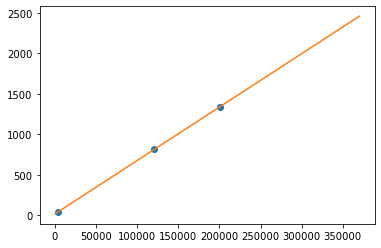

In [300]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#4019 42.43043494224548 40199  40199  281.12068939208984 120600 820.6956114768982  201001 1340  361803 2563.249900817871
x = [[4019],[120600],[201001] ]
y = [[42],[820.6956114768982],[1340]]
reg = LinearRegression().fit(x,y)
x_pre = np.linspace(0,370000,5)
x_pre = x_pre.reshape(-1,1)
y_pre = reg.predict(x_pre)
plt.plot(x, y,'o')
plt.plot(x_pre, y_pre)
plt.show()

In [303]:
reg.predict([[361803]])

array([[2404.72537245]])

In [302]:
a = reg.coef_
b = reg.intercept_
print(a,b)

[[0.00659588]] [18.31456436]


In [231]:
model.eval()
x = torch.tensor( X_train[:,:,:]).float()
x = torch.where(torch.isnan(x), torch.full_like(x, 0), x)
    
y = y_train[:]
y = np.array(y)
y = torch.tensor(np.reshape(y,[-1,1]))
y = y.float()
    
x = x.cuda()
y = y.cuda()

x_valid = torch.tensor(X_valid[:,:,:]).float()
x_valid = torch.where(torch.isnan(x_valid), torch.full_like(x_valid, 0), x_valid)
    
y_val = y_valid[:]
y_val = np.array(y_val)
y_val = torch.tensor(np.reshape(y_val,[-1,1]))
y_val = y_val.float()

x_valid = x_valid.cuda()
y_val = y_val.cuda()

train_acc = evaluate_accuracy(x_valid,y_val,model)
print("epoch:{} loss:{}".format(epoch,loss.item()))
print("train acc", evaluate_accuracy(x,y,model))
print("valid acc:",train_acc)

epoch:199 loss:0.11128345131874084
train acc 0.9777171554685837
valid acc: 0.9779850746268657


In [ ]:
import sklearn.metrics as sm
output,pre_out = model(x_valid)
output = torch.reshape(output,[-1,1])
output = output.ge(0.5)
print(output)
cr = sm.classification_report(y_valid, output)
cr

# update